# Analysis keyword using twitter

I will analysis keyword relation with 'Corona' in Korea.  
In this page we use association rule which is method of analysis to find specific rules by datasets.  
  
- Association rule : https://ratsgo.github.io/machine%20learning/2017/04/08/apriori/

In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
CONSUMER_KEY = "b9qH155339oGupNA84iTfbhnE"
CONSUMER_SECRET = "9Y53cVaFWfWgMxD2RvHHszDLlID0O3IwpwX1ZrzMYeLaAYd4NI"
ACCESS_TOKEN_KEY = "1277100704033734656-jVl0J93NkAVKiVS9ftbQsNAqKfWnyP"
ACCESS_TOKEN_SECRET = "HygyWciikE7MrZqCKb607j9LOX3mgMFDIuBeOHZN64Ufk"

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth)

keyword='코로나'


columns = ['created_at', 'tweet_text']
df = pd.DataFrame(columns=columns)

for i in range(100):
    tweets = api.search(keyword)
    for tweet in tweets:
        tweet_text = tweet.text
        created = tweet.created_at
        df = df.append(pd.Series([created, tweet_text], index=df.columns), ignore_index=True)
df.head()

,created_at,tweet_text
0,2020-06-28 07:22:41,RT @Seoul_James_146: 🚨 신천지교회 성도들이 내부결속을 다지고 있다...
1,2020-06-28 07:22:40,"RT @Myst_Troubadour: (TV를 보면서) \n""왜 저기 사람들은 아무..."
2,2020-06-28 07:22:39,미중갈등이 점점 커지고 있다. 코로나로 미국은 수조 달러를 발행해서 달러 힘은 약해...
3,2020-06-28 07:22:30,RT @mbcnews: 인천시는 부평구에 사는 29살 남성 A씨가 어젯밤 코로나19...
4,2020-06-28 07:22:26,RT @tokicullen: 코로나 난리나길 바라며 경기도 확진자 속출에도 일부러 ...


## Get keyword

I will preprocess keyword by text_cleaning()

In [2]:
import re

def text_cleaning(text):
    korean = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = korean.sub('', text)
    return result

df['ko_text'] = df['tweet_text'].apply(text_cleaning)

In [3]:
df

,created_at,tweet_text,ko_text
0,2020-06-28 07:22:41,RT @Seoul_James_146: 🚨 신천지교회 성도들이 내부결속을 다지고 있다...,신천지교회 성도들이 내부결속을 다지고 있다 사실이 아닙니다신천지팩트체크신천지바...
1,2020-06-28 07:22:40,"RT @Myst_Troubadour: (TV를 보면서) \n""왜 저기 사람들은 아무...",를 보면서 왜 저기 사람들은 아무도 마스크를 안써요옛날에 찍은거라서 그래아 옛날...
2,2020-06-28 07:22:39,미중갈등이 점점 커지고 있다. 코로나로 미국은 수조 달러를 발행해서 달러 힘은 약해...,미중갈등이 점점 커지고 있다 코로나로 미국은 수조 달러를 발행해서 달러 힘은 약해지...
3,2020-06-28 07:22:30,RT @mbcnews: 인천시는 부평구에 사는 29살 남성 A씨가 어젯밤 코로나19...,인천시는 부평구에 사는 살 남성 씨가 어젯밤 코로나 확진 판정을 받았다고 밝혔습...
4,2020-06-28 07:22:26,RT @tokicullen: 코로나 난리나길 바라며 경기도 확진자 속출에도 일부러 ...,코로나 난리나길 바라며 경기도 확진자 속출에도 일부러 손 놓고 있었던거구나 그렇...
...,...,...,...
1364,2020-06-28 07:24:28,"RT @Myst_Troubadour: (TV를 보면서) \n""왜 저기 사람들은 아무...",를 보면서 왜 저기 사람들은 아무도 마스크를 안써요옛날에 찍은거라서 그래아 옛날...
1365,2020-06-28 07:24:27,RT @Mangju0613: 달리자 아미 현제 폼 작성자가 500명이 \n넘었다는 ...,달리자 아미 현제 폼 작성자가 명이 넘었다는 이야기가 있는데일단 달리자 아미에 ...
1366,2020-06-28 07:24:27,https://t.co/al1aAaPw4Y 마스크 비말차단마스크 최저가 판매 KF...,마스크 비말차단마스크 최저가 판매 마스크 유한킴벌리 확진자 유한킴벌리 코...
1367,2020-06-28 07:24:21,RT @JungYookstore: 200628\n은광이 영상 팬싸 후기 (소리X)...,은광이 영상 팬싸 후기 소리은광이 안 아팠어요뭐가 안아퍼여 하늘에서 떨어질때 ...


In [4]:
from konlpy.tag import Okt
from collections import Counter

korean_stopwords_path = '../data/korean_stopwords.txt'
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
nouns_tagger = Okt()
def get_nouns(x):
    nouns = nouns_tagger.nouns(x)
    nouns = [noun for noun in nouns if len(noun) > 1 if noun not in stopwords]
    return nouns

df['nouns'] = df['ko_text'].apply(get_nouns)
df.head(10)

,created_at,tweet_text,ko_text,nouns
0,2020-06-28 07:22:41,RT @Seoul_James_146: 🚨 신천지교회 성도들이 내부결속을 다지고 있다...,신천지교회 성도들이 내부결속을 다지고 있다 사실이 아닙니다신천지팩트체크신천지바...,"[신천지교회, 성도, 내부, 결속, 다지, 사실, 신천지, 팩트, 체크, 신천지, ..."
1,2020-06-28 07:22:40,"RT @Myst_Troubadour: (TV를 보면서) \n""왜 저기 사람들은 아무...",를 보면서 왜 저기 사람들은 아무도 마스크를 안써요옛날에 찍은거라서 그래아 옛날...,"[사람, 아무, 마스크, 옛날, 옛날, 코로나, 공기오염, 방독면, 디스토피아, 세..."
2,2020-06-28 07:22:39,미중갈등이 점점 커지고 있다. 코로나로 미국은 수조 달러를 발행해서 달러 힘은 약해...,미중갈등이 점점 커지고 있다 코로나로 미국은 수조 달러를 발행해서 달러 힘은 약해지...,"[갈등, 점점, 코로나, 미국, 수조, 달러, 발행, 달러, 중국, 미국, 믿음, ..."
3,2020-06-28 07:22:30,RT @mbcnews: 인천시는 부평구에 사는 29살 남성 A씨가 어젯밤 코로나19...,인천시는 부평구에 사는 살 남성 씨가 어젯밤 코로나 확진 판정을 받았다고 밝혔습...,"[인천, 부평구, 남성, 어젯밤, 코로나, 확진, 판정, 지난, 서울, 여의도, 한..."
4,2020-06-28 07:22:26,RT @tokicullen: 코로나 난리나길 바라며 경기도 확진자 속출에도 일부러 ...,코로나 난리나길 바라며 경기도 확진자 속출에도 일부러 손 놓고 있었던거구나 그렇...,"[코로나, 난리, 경기도, 진자, 속출, 일부러, 국민, 목숨, 대통령, 노욕, 이..."
5,2020-06-28 07:22:24,RT @oksusu_gyeo: 형제 자매님들 주일입니다 \n각자 집에서 마음으로 예...,형제 자매님들 주일입니다 각자 집에서 마음으로 예배드리실거죠주님의 자녀들이 코로...,"[형제, 자매, 주일, 마음, 예배, 주님, 자녀, 코로나, 확진, 주님, 교회, ..."
6,2020-06-28 07:22:22,코로나 재확산에 대전 도심 '썰렁'..불안한 시민들 외출도 꺼려\n\n시내 식당가 ...,코로나 재확산에 대전 도심 썰렁불안한 시민들 외출도 꺼려시내 식당가 주변도 한산마스...,"[코로나, 확산, 대전, 도심, 시민, 외출, 식당가, 주변, 한산, 마스크, 시민..."
7,2020-06-28 07:22:22,https://t.co/h8w3dv7a8A 마스크 비말차단마스크 최저가 판매 확진...,마스크 비말차단마스크 최저가 판매 확진자 덴탈마스크 유한킴벌리 코로나 확진자...,"[마스크, 비말, 차단, 마스크, 최저, 판매, 진자, 덴탈, 마스크, 유한킴벌리,..."
8,2020-06-28 07:22:15,RT @1990KISU: 코로나 19 없어졌으면 좋겠습니다. https://t.co...,코로나 없어졌으면 좋겠습니다,[코로나]
9,2020-06-28 07:22:12,RT @utopian_moon: 발열 체크가 만능은 아닙니다\n\n역대 최고로 더웠...,발열 체크가 만능은 아닙니다역대 최고로 더웠던 날점심 먹고 복귀하니 도열감지 카...,"[발열, 체크, 만능, 역대, 최고, 점심, 복귀, 도열, 감지, 카메라, 알람, ..."


In [5]:
from apyori import apriori
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction]
print(transactions[:2])

[['신천지교회', '성도', '내부', '결속', '다지', '사실', '신천지', '팩트', '체크', '신천지', '코로나', '가짜', '뉴스'], ['사람', '아무', '마스크', '옛날', '옛날', '코로나', '공기오염', '방독면', '디스토피아', '세계관', '대사']]


In [6]:
results = list(apriori(transactions))
print(results)

[RelationRecord(items=frozenset({'교회'}), support=0.13221329437545654, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'교회'}), confidence=0.13221329437545654, lift=1.0)]), RelationRecord(items=frozenset({'뉴스'}), support=0.13805697589481372, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'뉴스'}), confidence=0.13805697589481372, lift=1.0)]), RelationRecord(items=frozenset({'마스크'}), support=0.2220598977355734, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'마스크'}), confidence=0.2220598977355734, lift=1.0)]), RelationRecord(items=frozenset({'사람'}), support=0.11468224981738495, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'사람'}), confidence=0.11468224981738495, lift=1.0)]), RelationRecord(items=frozenset({'상황'}), support=0.11614317019722425, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'상황'}), confidence=0.11614317019

In [7]:
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns= columns)
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        network_df = network_df.append(pd.Series(row, index=columns), ignore_index=True)
network_df.head(10)

,source,target,support
0,교회,코로나,0.132213
1,신천지,뉴스,0.100804
2,코로나,뉴스,0.138057
3,마스크,사람,0.105917
4,마스크,코로나,0.213294
5,사람,코로나,0.114682
6,상황,코로나,0.116143
7,신천지,코로나,0.114682


In [8]:
tweet_corpus = "".join(df['ko_text'].tolist())
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x: count[x] for x in count if len(x) > 1})

node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'node_size'])
node_df = node_df[node_df['node_size'] >= 50]
node_df['node_size'] = node_df['node_size']/10
node_df.head()

,node,node_size
1,성도,8.7
2,내부,5.3
6,신천지,19.3
7,팩트,8.7
8,체크,10.2


/Users/h/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


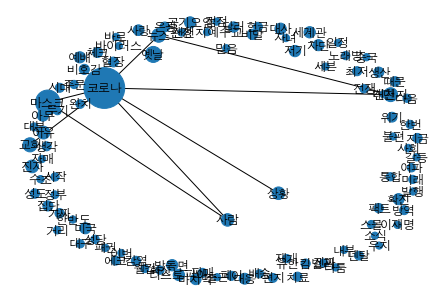

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['node_size'])
    
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])

pos = nx.spring_layout(G, k=.6, iterations=50)
sizes = [G.node[node]['nodesize']*10 for node in G]
nx.draw(G, pos =pos, node_size=sizes)

nx.draw_networkx_labels(G, pos=pos, font_family='AppleGothic')
ax = plt.gca()
plt.show()

## have to study
- apriori algorithm
- networkx